In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as Line2D
import numpy as np

In [2]:
Matriculas = {'Ano':[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
     'EaD':[930920, 993062, 1113958, 1153640, 1341876, 1393780, 1494427, 1759250, 2056559, 2450265, 3105803, 3716370, 4330934, 4913281],
     'Presencial':[5476813, 5772478, 5944126, 6169324, 6497889, 6639794, 6557827, 6531661, 6395189, 6154261, 5575142, 5270750, 5113182, 5063936]}

In [3]:
# Criando o df e acrescentando a coluna "Total":
df_mat = pd.DataFrame(Matriculas)
df_mat['Total'] = df_mat['EaD'] + df_mat['Presencial']

In [4]:
df_mcat_adm = df.DataFrame(m_cat_adm)

NameError: name 'df' is not defined

In [88]:
# Calculando a porcentagem de cada modalidade:
df_mat['%_EaD'] = (df_mat['EaD'] / df_mat['Total']) * 100
df_mat['%_Presencial'] = (df_mat['Presencial'] / df_mat['Total']) * 100

In [89]:
# Filtrando dados a partir de 2015:
df_filtro = df_mat[df_mat['Ano'] >= 2015].copy()

In [90]:
# Extrair dados para o ano de 2023
ano_detalhe = 2023
dados_2023 = df_mat[df_mat['Ano']== ano_detalhe]

In [91]:
presencial_per_2023 = dados_2023['%_Presencial'].values[0]
ead_per_2023 = dados_2023['%_EaD'].values[0]
diferenca_perc = abs(presencial_per_2023 - ead_per_2023)

modalidade = ['Graduação Presencial', 'Graduação a Distância']
percentual = [presencial_per_2023, ead_per_2023]
cores = ['#2196F3', '#4CAF50'] # Azul: presencial, Verde: EaD

# 1 linha, 2 colunas, tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(18,7)) 

# Gráfico 1: Evoluçao da porcentagem de matrículas ao longo do tempo (a partir de 2015):
sns.set_style("whitegrid")

# Plotar a porcentagem de cada modalidade no primeiro subplot (axes[0]):
sns.lineplot(x='Ano', y='%_EaD', data=df_filtro, marker='o', label='EaD', color='#4CAF50', linewidth=2.5, ax=axes[0]) # verde
sns.lineplot(x='Ano', y='%_Presencial', data=df_filtro, marker='o', label='Presencial', color='#2196F3', linewidth=2.5, ax=axes[0]) # Azul

# Adicionar pontos para os últimos dois anos:
for i in df_filtro[df_filtro['Ano'].isin([2022, 2023])].index:
    axes[0].plot(df_filtro.loc[i, 'Ano'], df_filtro.loc[i, '%_EaD'], 'o', color='red', markersize=8, markeredgecolor='black', zorder=5)
    axes[0].plot(df_filtro.loc[i, 'Ano'], df_filtro.loc[i, '%_Presencial'], 'o', color='red', markersize=8, markeredgecolor='black', zorder=5)

# Anotação para os últimos dois anos:
for ano in [2022, 2023]:
    e_perc = df_filtro[df_filtro['Ano'] == ano]['%_EaD'].values[0]
    p_perc = df_filtro[df_filtro['Ano'] == ano]['%_Presencial'].values[0]
    axes[0].annotate(f'{e_perc:.2f}%', (ano, e_perc), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='#4CAF50')
    axes[0].annotate(f'{p_perc:.2f}%', (ano, p_perc), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='#2196F3')

axes[0].set_title('Evolução Percentual das Matrículas em Graduação (a partir de 2015)', fontsize=16, pad=20)
axes[0].set_xlabel('Ano', fontsize= 11)
axes[0].set_ylabel('Percentual de Matrículas (%)', fontsize=11)
axes[0].set_xticks(df_filtro['Ano'].unique())
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0,100)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Modalidade', loc='center left', bbox_to_anchor=(1.05, 0.5))


# Gráfico 2: Detalhamento do último ano (2023) - Diferença Percentual





# Plotar a figura

bars = axes[1].bar(modalidade, percentual, color=cores, width=0.6)

axes[1].set_title(f'Diferença Percentual entre Matrículas em Cursos de Graduação\nPresencial e a Distância em {ano_detalhe}', fontsize=14, pad=10)
axes[1].set_ylabel('Percentual de Matrículas (%)', fontsize=11)
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adcionar os valores percentuais nas barras
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adcionar a seta e o texto da diferença percentual

# Cordenadas aproximadas para a seta e o texto:

x_start = bars[0].get_x() + bars[0].get_width()/2
x_end = bars[1].get_x() +bars[1].get_width()/2
y_pos = (max(percentual) + min(percentual)) /2 # Posição y no meio das barras para a seta

# Ajuste de posiçao da seta para evitar sobreposição:
y_offset_arrow = 5 # Ajuste para a seta fica um pouco acima
y_offset_text = 10 # Ajuste para a texto ficar um pouco acima da seta

axes[1].annotate(
    '', xy=(x_end, ead_per_2023 + y_offset_arrow), xytext=(x_start, presencial_per_2023 + y_offset_arrow),
    arrowprops=dict(arrowstyle='<->', color='red', lw=2, linestyle='--'),
    fontsize=12, color='red', ha='center'
)

axes[1].text(
    (x_start + x_end) / 2, (max(percentual) + min(percentual)) /2 + y_offset_text,
    f'Diferença: {diferenca_perc:.2f}%',
    ha='center', va='bottom', fontsize=11, color='red', fontweight='bold'
)


plt.tight_layout() # Ajusta automaticamente os parâmetros do subplot para que caiba na área da figura
plt.savefig('figura_2_Evolução_%', dpi=300, bbox_inches='tight')
plt.show()

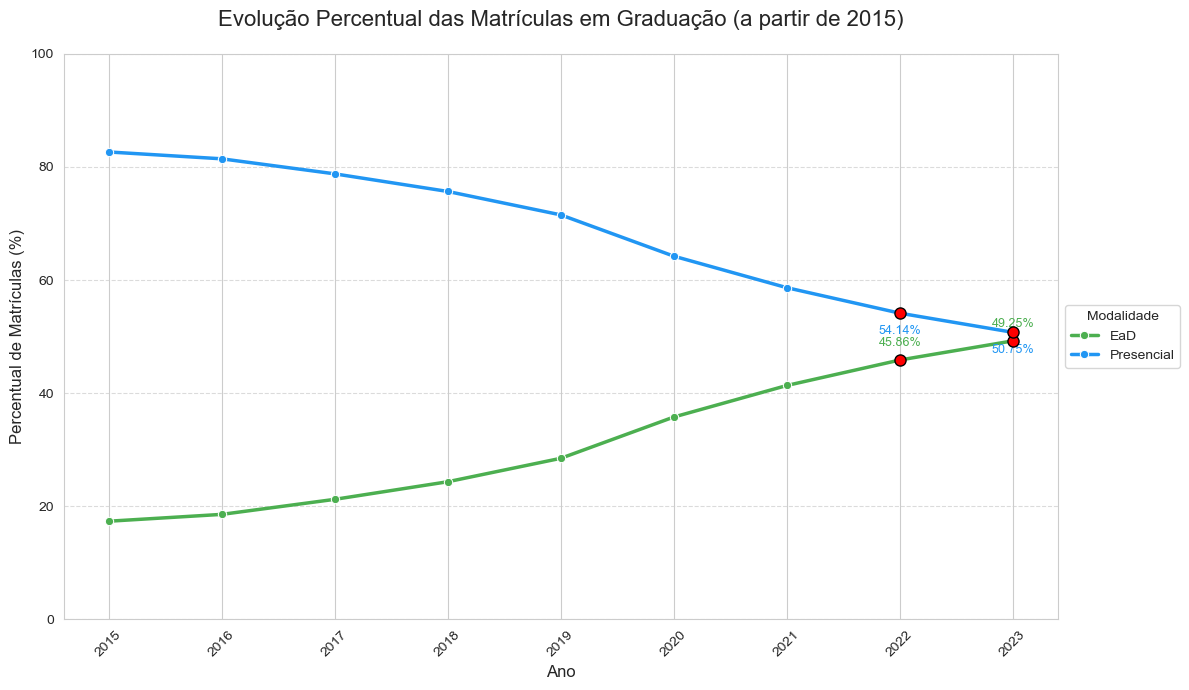

In [92]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plotar a percentagem de cada modalidade
sns.lineplot(x='Ano', y='%_EaD', data=df_filtro, marker='o', label='EaD', color='#4CAF50', linewidth=2.5) # Verde
sns.lineplot(x='Ano', y='%_Presencial', data=df_filtro, marker='o', label='Presencial', color='#2196F3', linewidth=2.5) # Azul

# Adicionar pontos para os últimos dois anos
for i in df_filtro[df_filtro['Ano'].isin([2022, 2023])].index:
    plt.plot(df_filtro.loc[i, 'Ano'], df_filtro.loc[i, '%_EaD'], 'o', color='red', markersize=8, markeredgecolor='black', zorder=5)
    plt.plot(df_filtro.loc[i, 'Ano'], df_filtro.loc[i, '%_Presencial'], 'o', color='red', markersize=8, markeredgecolor='black', zorder=5)

# Anotações para os últimos dois anos
for ano in [2022, 2023]:
    e_perc = df_filtro[df_filtro['Ano'] == ano]['%_EaD'].values[0]
    p_perc = df_filtro[df_filtro['Ano'] == ano]['%_Presencial'].values[0]
    plt.annotate(f'{e_perc:.2f}%', (ano, e_perc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='#4CAF50')
    plt.annotate(f'{p_perc:.2f}%', (ano, p_perc), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='#2196F3')


plt.title('Evolução Percentual das Matrículas em Graduação (a partir de 2015)', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual de Matrículas (%)', fontsize=12)
plt.xticks(df_filtro['Ano'].unique(), rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modalidade', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('Figura_2_Evolução_Percentual_Matriculas.png', dpi=300, bbox_inches='tight')
plt.show()



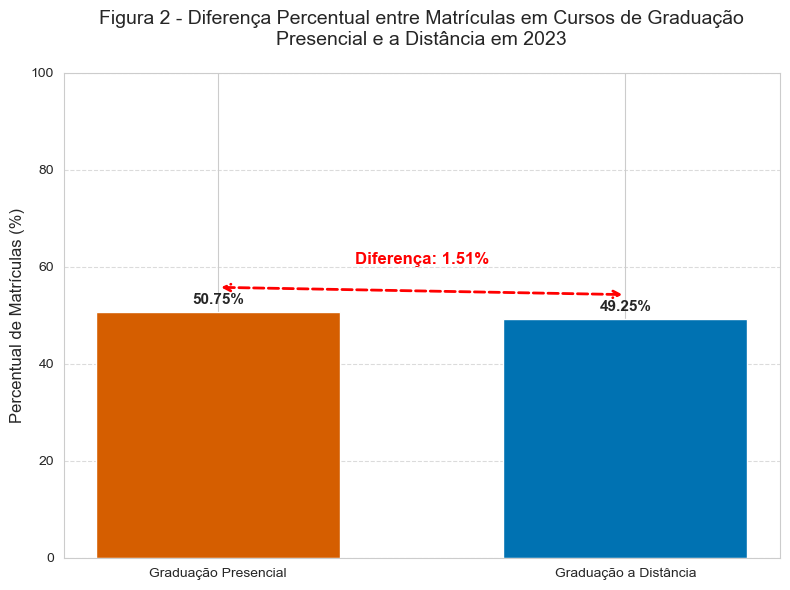

In [93]:
# --- Gráfico 2: Detalhamento do último ano (2023) - Diferença Percentual ---
# Extrair dados para o ano de 2023
ano_detalhe = 2023
dados_2023 = df_mat[df_mat['Ano'] == ano_detalhe]

presencial_perc_2023 = dados_2023['%_Presencial'].values[0]
ead_perc_2023 = dados_2023['%_EaD'].values[0]
diferenca_perc = abs(presencial_perc_2023 - ead_perc_2023)

modalidades = ['Graduação Presencial', 'Graduação a Distância']
percentuais = [presencial_perc_2023, ead_perc_2023]
cores = ['#D55E00', '#0072B2'] # Azul para Presencial, Verde para EaD

plt.figure(figsize=(8, 6))
bars = plt.bar(modalidades, percentuais, color=cores, width=0.6)

plt.title(f'Figura 2 - Diferença Percentual entre Matrículas em Cursos de Graduação\nPresencial e a Distância em {ano_detalhe}', fontsize=14, pad=20)
plt.ylabel('Percentual de Matrículas (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Adicionar a seta e o texto da diferença percentual
# Coordenadas aproximadas para a seta e o texto
x_start = bars[0].get_x() + bars[0].get_width()/2
x_end = bars[1].get_x() + bars[1].get_width()/2
y_pos = (max(percentuais) + min(percentuais)) / 2 # Posição Y no meio das barras para a seta

# Ajustar a posição da seta e do texto para evitar sobreposição
y_offset_arrow = 5 # Ajuste para a seta ficar um pouco acima
y_offset_text = 10 # Ajuste para o texto ficar um pouco acima da seta

plt.annotate(
    '', xy=(x_end, ead_perc_2023 + y_offset_arrow), xytext=(x_start, presencial_perc_2023 + y_offset_arrow),
    arrowprops=dict(arrowstyle='<->', color='red', lw=2, linestyle='--'),
    fontsize=12, color='red', ha='center'
)

plt.text(
    (x_start + x_end) / 2, (max(percentuais) + min(percentuais)) / 2 + y_offset_text,
    f'Diferença: {diferenca_perc:.2f}%',
    ha='center', va='bottom', fontsize=12, color='red', fontweight='bold'
)

plt.tight_layout()
plt.savefig('Figura_2_Diferenca_Percentual_Matriculas.png', dpi=300, bbox_inches='tight')
plt.show()

(Figura 3 - Distribuição das matrículas em cursos de graduação, presenciais e a distância, entre instituições públicas e privadas)

In [5]:
m_cat_adm = {
    'Ano':[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'ead_priv':[749318, 815138, 932334, 999087, 1202503, 1265387, 1371826, 1591413, 1883584, 2292608, 2948431, 3544149, 4148677, 4712303],
    'ead_pub': [181602, 177924, 181624, 154553, 139373, 128393, 122601, 167837, 172975, 157657, 157372, 172221, 182257, 200978],
    'pres_priv': [4014744, 4176760, 4227932, 4390861, 4675696, 4815602, 4689930, 4651412, 4490329, 4231500, 3775908, 3364065, 3218686, 3195548],
    'pres_pub': [1472439, 1606216, 1725954, 1788328, 1823171, 1824192, 1867897, 1880249, 1904860, 1922761, 1799234, 1906685, 1894496, 1868388]
}

In [6]:
df_mcata = pd.DataFrame(m_cat_adm)

In [7]:
df_mcata.head()

,Ano,ead_priv,ead_pub,pres_priv,pres_pub
0,2010,749318,181602,4014744,1472439
1,2011,815138,177924,4176760,1606216
2,2012,932334,181624,4227932,1725954
3,2013,999087,154553,4390861,1788328
4,2014,1202503,139373,4675696,1823171


In [8]:
# Reorganizar os Dados (melting) "Deretendo o dataframe"
df_melt_cat_adm = df_mcata.melt(
    id_vars='Ano',
    value_vars=['ead_priv', 'ead_pub', 'pres_priv', 'pres_pub'],
    var_name='Modalidade_Instituicao',
    value_name='Matriculas'
)

In [9]:
# Criando novas colunas na df (df_melt_cat_adm) - Modalidade e Instituição a partir da variável'Modalidade_Instituição':
df_melt_cat_adm['Modalidade'] = df_melt_cat_adm['Modalidade_Instituicao'].apply(lambda x:'EaD' if 'ead' in x else 'Presencial')
df_melt_cat_adm['Instituicao'] = df_melt_cat_adm['Modalidade_Instituicao'].apply(lambda x: 'Privada' if 'priv' in x else 'Pública')

In [10]:
# Ordenar as instituições para o empilhamento consistente (ex: Público em baixo , privado em cima)
instituicao_order = ['Pública', 'Privada'] # Ordem de empilhamento de baixo para cima

In [11]:
df_melt_cat_adm['Instituicao'] = pd.Categorical(df_melt_cat_adm['Instituicao'], categories=instituicao_order, ordered=True)

In [12]:
#df_melt_cat_adm = df_melt_cat_adm.rename(columns={'Instituição': 'Instituicao'})

In [13]:
# Filtro para o ano mais recente:
ano_para_grafico = 2023
df_filtered_cat_adm = df_melt_cat_adm[df_melt_cat_adm['Ano'] == ano_para_grafico].copy()

In [14]:
# Calcular o percentual de cada fatia dentro de sua modalidade para o label na barra:
df_filtered_cat_adm['Total_Modalidade'] = df_filtered_cat_adm.groupby('Modalidade')['Matriculas'].transform('sum')
df_filtered_cat_adm['Percentual_Modalidade'] = (df_filtered_cat_adm['Matriculas'] / df_filtered_cat_adm['Total_Modalidade']) * 100

In [15]:
df_filtered_cat_adm.tail()

,Ano,Modalidade_Instituicao,Matriculas,Modalidade,Instituicao,Total_Modalidade,Percentual_Modalidade
13,2023,ead_priv,4712303,EaD,Privada,4913281,95.909495
27,2023,ead_pub,200978,EaD,Pública,4913281,4.090505
41,2023,pres_priv,3195548,Presencial,Privada,5063936,63.104036
55,2023,pres_pub,1868388,Presencial,Pública,5063936,36.895964


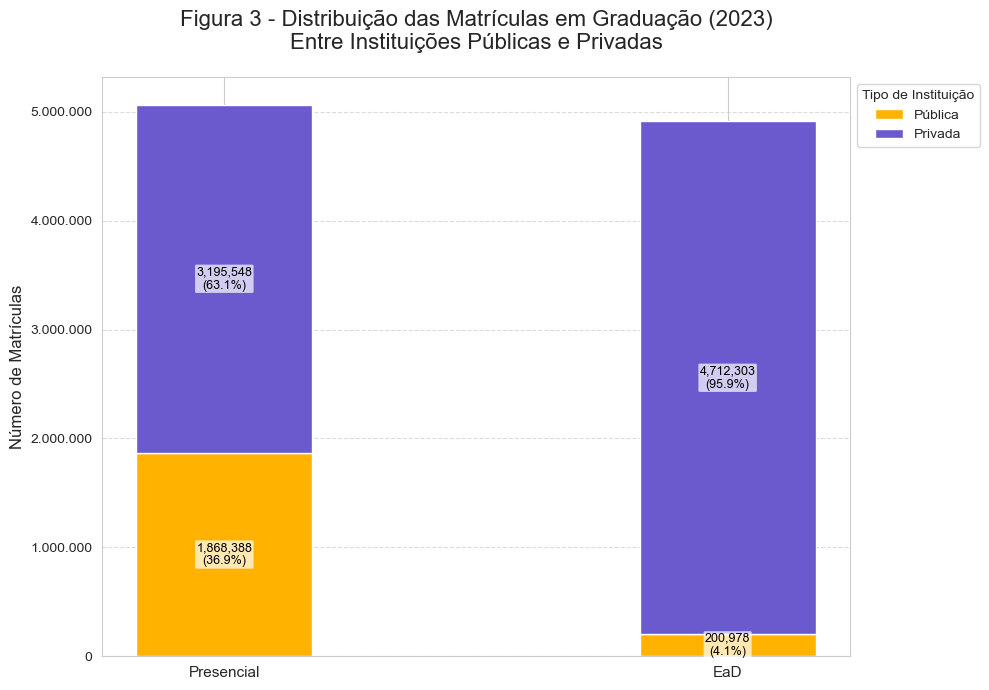

In [16]:
# Ordenar as instituições para empilhamento consistente (Pública embaixo, Privada em cima)
instituicao_order = ['Pública', 'Privada']
df_filtered_cat_adm['Instituicao'] = pd.Categorical(df_filtered_cat_adm['Instituicao'], categories=instituicao_order, ordered=True)
df_filtered_cat_adm = df_filtered_cat_adm.sort_values(by=['Modalidade', 'Instituicao'])


# --- Preparando os dados para o plot manual com Matplotlib ---
# Agrupando os dados para facilitar o acesso
data_presencial = df_filtered_cat_adm[df_filtered_cat_adm['Modalidade'] == 'Presencial']
data_ead = df_filtered_cat_adm[df_filtered_cat_adm['Modalidade'] == 'EaD']

# Matrículas para Presencial
pres_pub = data_presencial[data_presencial['Instituicao'] == 'Pública']['Matriculas'].values[0]
pres_priv = data_presencial[data_presencial['Instituicao'] == 'Privada']['Matriculas'].values[0]

# Matrículas para EaD
ead_pub = data_ead[data_ead['Instituicao'] == 'Pública']['Matriculas'].values[0]
ead_priv = data_ead[data_ead['Instituicao'] == 'Privada']['Matriculas'].values[0]

# Percentuais para Presencial
pres_pub_perc = data_presencial[data_presencial['Instituicao'] == 'Pública']['Percentual_Modalidade'].values[0]
pres_priv_perc = data_presencial[data_presencial['Instituicao'] == 'Privada']['Percentual_Modalidade'].values[0]

# Percentuais para EaD
ead_pub_perc = data_ead[data_ead['Instituicao'] == 'Pública']['Percentual_Modalidade'].values[0]
ead_priv_perc = data_ead[data_ead['Instituicao'] == 'Privada']['Percentual_Modalidade'].values[0]


# --- Criação do Gráfico de Barras Agrupadas e Empilhadas ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid") # Estilo visual

# Largura das barras
bar_width = 0.35

# Posições no eixo X para cada grupo de modalidade
# Duas posições para cada modalidade para ter barras "agrupadas" (mas na verdade serão empilhadas em si)
# A ideia é ter uma posição central para o "grupo" da modalidade e then offset para as barras empilhadas
indices = np.arange(2) # 0 para Presencial, 1 para EaD

# Cores
color_pub = '#FFB300' # Amarelo para Pública
color_priv = '#6A5ACD' # SloteBlue para Privada-

# --- Barras Empilhadas para Presencial ---
# Barra da base (Pública)
bar1_pub = plt.bar(indices[0], pres_pub, bar_width, label='Pública', color=color_pub, zorder=2)
# Barra de cima (Privada), empilhada sobre a Pública
bar1_priv = plt.bar(indices[0], pres_priv, bar_width, bottom=pres_pub, label='Privada', color=color_priv, zorder=2)

# --- Barras Empilhadas para EaD ---
# Barra da base (Pública)
bar2_pub = plt.bar(indices[1], ead_pub, bar_width, color=color_pub, zorder=2)
# Barra de cima (Privada), empilhada sobre a Pública
bar2_priv = plt.bar(indices[1], ead_priv, bar_width, bottom=ead_pub, color=color_priv, zorder=2)


# --- Adicionar Rótulos (Valores Absolutos e Percentuais) ---
# Função auxiliar para adicionar rótulos
def add_labels(bar_container, value, percentage, y_offset=0, color='black'):
    for bar in bar_container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + height / 2 + y_offset # Centro da fatia + offset

        # Formato do texto: Valor Absoluto (Percentual)
        text = f'{value:,.0f}\n({percentage:.1f}%)'
        plt.text(x, y, text, ha='center', va='center', color=color, fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.1", fc='white', ec='none', alpha=0.7))


# Rótulos para Presencial
add_labels(bar1_pub, pres_pub, pres_pub_perc)
add_labels(bar1_priv, pres_priv, pres_priv_perc)

# Rótulos para EaD
add_labels(bar2_pub, ead_pub, ead_pub_perc)
add_labels(bar2_priv, ead_priv, ead_priv_perc)


# --- Configurações do Gráfico ---
plt.title(f'Figura 3 - Distribuição das Matrículas em Graduação ({ano_para_grafico})\nEntre Instituições Públicas e Privadas', fontsize=16, pad=20)
plt.ylabel('Número de Matrículas', fontsize=12)
plt.xticks(indices, ['Presencial', 'EaD'], fontsize=11) # Define os rótulos do eixo X
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y') # Evita notação científica no eixo Y se os números forem grandes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', '.')))

# Criar a legenda manualmente para evitar duplicação (por causa do label='Pública' em ambos os bars)
# A função bar() retorna um BarContainer. Pegamos os elementos para a legenda.
handles = [bar1_pub[0], bar1_priv[0]] # Apenas uma barra de cada tipo para a legenda
labels = ['Pública', 'Privada']
plt.legend(handles=handles, labels=labels, title='Tipo de Instituição', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('Figura 3 - Distribuição das matrículas em cursos de graduação, presenciais e a distância, entre instituições públicas e privadas', dpi=300, bbox_inches='tight')
plt.show()